<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_04_rnns_lstm/LSTM_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de Deep Learning para Séries Temporais (LSTMs)

Disciplina: Métodos e Modelos Avançados em Ciência de Dados

Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná

Aula 04: RNNs e LSTMs

Exemplo 02: Executando LSTM para série temporal univariada (airline-passengers)

---

In [1]:
# importando as bibliotecas necessárias para rodar o script

# manipulação de números de ponto flutuante
import numpy as np

# plotagem de gráficos
import matplotlib.pyplot as plt

# criação manipulação de data frames
import pandas as pd

# funções matemáticas
import math

# criação dos modelos de DL
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# preprocessador - escalar os dados
from sklearn.preprocessing import MinMaxScaler

# metrica de desempenho (MSE)
from sklearn.metrics import mean_squared_error

In [2]:
# definir um seed para reprodução dos experimentos
np.random.seed(42)

In [3]:
# funcao auxiliar para criar os itervalos de previsao
# é a mesma que usamos no exemplo anterior
def create_dataset(dataset, janela_previsao=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-janela_previsao-1):
        a = dataset[i:(i+janela_previsao), 0]
        dataX.append(a)
        dataY.append(dataset[i + janela_previsao, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
# obter dataset --> https://github.com/jbrownlee/Datasets
# Exemplo: shampoo, venda de shampoos ao longo de três anos

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# vislumbrar um pedaço dos dados e formato lido
print("\n* Dimensão dos dados:", dataset.shape) 
# 36 amostras/instâncias, univariadas (um único valor real)
print("* Dados originais:")
print(dataset[:10])


* Dimensão dos dados: (144, 1)
* Dados originais:
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]]


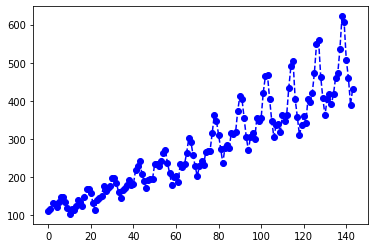

In [5]:
# plotar os dados para visualizar a nossa time series
plt.plot(dataset, linestyle='--', marker='o', color='b')

In [6]:
# Normalizando os dados

# escalar os dados no intervalo [0,1] usando sklearn
# from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

print("* Dados escalados:")
print(dataset[:10].transpose())

* Dados escalados:
[[0.01544401 0.02702703 0.05405405 0.04826255 0.03281853 0.05984557
  0.08494207 0.08494207 0.06177607 0.02895753]]


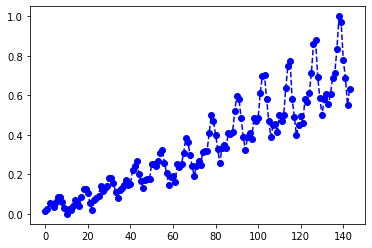

In [7]:
# visualizar nossos dados escalados
# Obs: prestar atenção ao eixo Y, agora varia entre [0, +1]
plt.plot(dataset, linestyle='--', marker='o', color='b')

In [8]:
# Ajustando conjunto de treino e teste
# 85% dos exemplos no treino, 15% no teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

#print(train_size, test_size)
print("- Numero de instâncias treino: ", train_size)
print("- Numero de instâncias teste: ", test_size)

- Numero de instâncias treino:  96
- Numero de instâncias teste:  48


In [9]:
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Conjunto de treinamento - amostras de 0-95
# Conjunto de teste - amostras de 96-143
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print("* Conjunto de Treinamento:", train.shape)
#print(train)

print("* Conjunto de Teste:", test.shape)
#print(test)


* Conjunto de Treinamento: (96, 1)
* Conjunto de Teste: (48, 1)


In [10]:
# reshape em X=t and Y=t+1
# isto é, criando dados no padrão DF = [X|Y]
# para cada X, o Y = X+1

janela_previsao = 1
trainX, trainY = create_dataset(train, janela_previsao)

# vendo o nosso conjunto de treinamento
print("DF = [X | X+1]")
np.column_stack((trainX, trainY))


DF = [X | X+1]


array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557],
       [0.05984557, 0.08494207],
       [0.08494207, 0.08494207],
       [0.08494207, 0.06177607],
       [0.06177607, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123553],
       [0.02123553, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984557],
       [0.05984557, 0.04054055],
       [0.04054055, 0.08687258],
       [0.08687258, 0.12741312],
       [0.12741312, 0.12741312],
       [0.12741312, 0.10424709],
       [0.10424709, 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949806],
       [0.06949806, 0.07915059],
       [0.07915059, 0.08880308],
       [0.08880308, 0.14285713],
       [0.14285713, 0.11389962],
       [0.11389962, 0.13127413],
       [0.13127413, 0.14285713],
       [0.14285713, 0.18339768],
       [0.

In [11]:
# reshape em X=t and Y=t+1 para o conjunto de teste
testX, testY  = create_dataset(test, janela_previsao)
print("Conjunto de Teste no formato supervisionado:")
print(testX)
print("Conjunto de Teste no formato supervisionado:")
print(testY)
print("\nDF = [X | X+1]")
np.column_stack((testX, testY))


Conjunto de Teste no formato supervisionado:
[[0.4073359 ]
 [0.3803089 ]
 [0.48648646]
 [0.47104248]
 [0.484556  ]
 [0.6138996 ]
 [0.6969112 ]
 [0.70077217]
 [0.57915056]
 [0.46911195]
 [0.38803086]
 [0.44787642]
 [0.45559844]
 [0.4131274 ]
 [0.4980695 ]
 [0.47104248]
 [0.49999997]
 [0.6389961 ]
 [0.7471043 ]
 [0.7741313 ]
 [0.57915056]
 [0.492278  ]
 [0.3976834 ]
 [0.44980696]
 [0.49420848]
 [0.45945945]
 [0.5830116 ]
 [0.5637065 ]
 [0.61003864]
 [0.71042466]
 [0.8571429 ]
 [0.8783784 ]
 [0.69305015]
 [0.5849421 ]
 [0.4980695 ]
 [0.58108103]
 [0.6042471 ]
 [0.554054  ]
 [0.60810804]
 [0.6891892 ]
 [0.71042466]
 [0.8320464 ]
 [1.        ]
 [0.96911204]
 [0.7799227 ]
 [0.6891892 ]]
Conjunto de Teste no formato supervisionado:
[0.3803089  0.48648646 0.47104248 0.484556   0.6138996  0.6969112
 0.70077217 0.57915056 0.46911195 0.38803086 0.44787642 0.45559844
 0.4131274  0.4980695  0.47104248 0.49999997 0.6389961  0.7471043
 0.7741313  0.57915056 0.492278   0.3976834  0.44980696 0.49420848

array([[0.4073359 , 0.3803089 ],
       [0.3803089 , 0.48648646],
       [0.48648646, 0.47104248],
       [0.47104248, 0.484556  ],
       [0.484556  , 0.6138996 ],
       [0.6138996 , 0.6969112 ],
       [0.6969112 , 0.70077217],
       [0.70077217, 0.57915056],
       [0.57915056, 0.46911195],
       [0.46911195, 0.38803086],
       [0.38803086, 0.44787642],
       [0.44787642, 0.45559844],
       [0.45559844, 0.4131274 ],
       [0.4131274 , 0.4980695 ],
       [0.4980695 , 0.47104248],
       [0.47104248, 0.49999997],
       [0.49999997, 0.6389961 ],
       [0.6389961 , 0.7471043 ],
       [0.7471043 , 0.7741313 ],
       [0.7741313 , 0.57915056],
       [0.57915056, 0.492278  ],
       [0.492278  , 0.3976834 ],
       [0.3976834 , 0.44980696],
       [0.44980696, 0.49420848],
       [0.49420848, 0.45945945],
       [0.45945945, 0.5830116 ],
       [0.5830116 , 0.5637065 ],
       [0.5637065 , 0.61003864],
       [0.61003864, 0.71042466],
       [0.71042466, 0.8571429 ],
       [0.

In [12]:
# Ajustando os conjunto de treino (trainX) e teste (testX) para o formato
# [samples, time_steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
print("- Dim train:", trainX.shape)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("- Dim test:  ", testX.shape)

print("Teste no formato para input:") #alternativamente poderíamos ter amostras multivariadas
print(testX)

- Dim train: (94, 1, 1)
- Dim test:   (46, 1, 1)
Teste no formato para input:
[[[0.4073359 ]]

 [[0.3803089 ]]

 [[0.48648646]]

 [[0.47104248]]

 [[0.484556  ]]

 [[0.6138996 ]]

 [[0.6969112 ]]

 [[0.70077217]]

 [[0.57915056]]

 [[0.46911195]]

 [[0.38803086]]

 [[0.44787642]]

 [[0.45559844]]

 [[0.4131274 ]]

 [[0.4980695 ]]

 [[0.47104248]]

 [[0.49999997]]

 [[0.6389961 ]]

 [[0.7471043 ]]

 [[0.7741313 ]]

 [[0.57915056]]

 [[0.492278  ]]

 [[0.3976834 ]]

 [[0.44980696]]

 [[0.49420848]]

 [[0.45945945]]

 [[0.5830116 ]]

 [[0.5637065 ]]

 [[0.61003864]]

 [[0.71042466]]

 [[0.8571429 ]]

 [[0.8783784 ]]

 [[0.69305015]]

 [[0.5849421 ]]

 [[0.4980695 ]]

 [[0.58108103]]

 [[0.6042471 ]]

 [[0.554054  ]]

 [[0.60810804]]

 [[0.6891892 ]]

 [[0.71042466]]

 [[0.8320464 ]]

 [[1.        ]]

 [[0.96911204]]

 [[0.7799227 ]]

 [[0.6891892 ]]]


In [13]:
# Criando nossa rede recorrente com unidades de LSTM 
# formato keras sequencial
model = Sequential()
model.add(LSTM(units=4, input_shape=(1, janela_previsao))) 
model.add(Dense(1))

# visualizar o modelo (arquitetura) que geramos
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [15]:
# parâmetros para otimizacao
# medida a ser minimizada = Erro quadrático médio (Mean Squared Error)
# Otimizador, algoritmo de treinamento = Adam
# métricas para avaliar o modelo = MSE, RMSE, MAE
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=["MeanSquaredError", "RootMeanSquaredError", "MeanAbsoluteError"]
) 

In [16]:
# Treinando nossa rede
# epocas = 100
# batch_size = 1, treinar amostra por amostra
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0395 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1988 - mean_absolute_error: 0.1537
Epoch 2/100
94/94 - 0s - loss: 0.0187 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1367 - mean_absolute_error: 0.1042
Epoch 3/100
94/94 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1212 - mean_absolute_error: 0.0980
Epoch 4/100
94/94 - 0s - loss: 0.0134 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1159 - mean_absolute_error: 0.0954
Epoch 5/100
94/94 - 0s - loss: 0.0125 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1117 - mean_absolute_error: 0.0901
Epoch 6/100
94/94 - 0s - loss: 0.0113 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1063 - mean_absolute_error: 0.0874
Epoch 7/100
94/94 - 0s - loss: 0.0103 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1017 - mean_absolute_error: 0.0836
Epoch 8/100
94/94 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - root_mean_squa

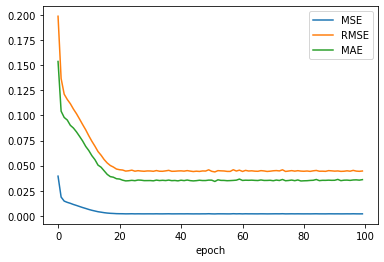

In [17]:
# Plotando os erros obtidos no conjunto de treinamento
# plotamos as três medidas (MSE, RMSE, MAE)
# percebam que depois de 20 épocas, não há uma redução significativa nos erros, 
#e o treinamento poderia ser feito com uma quantidade menor de iterações

# checar os nomes
#print(history.history.keys())

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.legend(['MSE', 'RMSE', 'MAE'], loc='upper right')
plt.show()

In [18]:
# Realizando as predições nos conjuntos de treino/teste

# predição no conjunto de trienamento
trainPredict = model.predict(trainX)

# predição no conjunto de teste
testPredict  = model.predict(testX)

In [19]:
print("Predição do Teste:")
print(testPredict)

print("\nDF = [Real | Predito]")
np.column_stack((testY, testPredict))

Predição do Teste:
[[0.3986477 ]
 [0.37384832]
 [0.46939263]
 [0.45582944]
 [0.4677041 ]
 [0.57616127]
 [0.6403217 ]
 [0.6431965 ]
 [0.54800004]
 [0.4541254 ]
 [0.38096362]
 [0.43525806]
 [0.44214463]
 [0.40392262]
 [0.4794827 ]
 [0.45582944]
 [0.48115736]
 [0.596028  ]
 [0.6769256 ]
 [0.6959437 ]
 [0.54800004]
 [0.47444668]
 [0.38982475]
 [0.4369824 ]
 [0.47612742]
 [0.44557694]
 [0.551166  ]
 [0.5352459 ]
 [0.5730695 ]
 [0.6503406 ]
 [0.7513413 ]
 [0.76479065]
 [0.63743705]
 [0.55274546]
 [0.4794827 ]
 [0.5495841 ]
 [0.5684142 ]
 [0.5272018 ]
 [0.57152   ]
 [0.63454264]
 [0.6503406 ]
 [0.73506975]
 [0.8363542 ]
 [0.8190403 ]
 [0.69995576]
 [0.63454264]]

DF = [Real | Predito]


array([[0.3803089 , 0.3986477 ],
       [0.48648646, 0.37384832],
       [0.47104248, 0.46939263],
       [0.484556  , 0.45582944],
       [0.6138996 , 0.4677041 ],
       [0.6969112 , 0.57616127],
       [0.70077217, 0.6403217 ],
       [0.57915056, 0.6431965 ],
       [0.46911195, 0.54800004],
       [0.38803086, 0.4541254 ],
       [0.44787642, 0.38096362],
       [0.45559844, 0.43525806],
       [0.4131274 , 0.44214463],
       [0.4980695 , 0.40392262],
       [0.47104248, 0.4794827 ],
       [0.49999997, 0.45582944],
       [0.6389961 , 0.48115736],
       [0.7471043 , 0.596028  ],
       [0.7741313 , 0.6769256 ],
       [0.57915056, 0.6959437 ],
       [0.492278  , 0.54800004],
       [0.3976834 , 0.47444668],
       [0.44980696, 0.38982475],
       [0.49420848, 0.4369824 ],
       [0.45945945, 0.47612742],
       [0.5830116 , 0.44557694],
       [0.5637065 , 0.551166  ],
       [0.61003864, 0.5352459 ],
       [0.71042466, 0.5730695 ],
       [0.8571429 , 0.6503406 ],
       [0.

In [20]:
# Aplicando a inversa da escala para retornar ao valor original
# training set
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

# testing set
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
print("\n * Predição do Teste na escala original:")
print(testPredict.shape)
print(testPredict)

#print("\nDF = [Real | Predito]")
#np.column_stack((testY, testPredict))

print("\n * Predição do Teste na escala original:")
print(testY.shape)
print(testY)


 * Predição do Teste na escala original:
(46, 1)
[[310.4995 ]
 [297.6534 ]
 [347.1454 ]
 [340.11966]
 [346.27072]
 [402.45154]
 [435.68665]
 [437.1758 ]
 [387.86404]
 [339.23694]
 [301.33917]
 [329.46368]
 [333.0309 ]
 [313.23193]
 [352.37207]
 [340.11966]
 [353.23953]
 [412.7425 ]
 [454.6475 ]
 [464.49884]
 [387.86404]
 [349.7634 ]
 [305.9292 ]
 [330.35687]
 [350.634  ]
 [334.80887]
 [389.504  ]
 [381.25735]
 [400.85004]
 [440.87646]
 [493.1948 ]
 [500.16156]
 [434.1924 ]
 [390.32214]
 [352.37207]
 [388.68457]
 [398.43854]
 [377.0905 ]
 [400.04733]
 [432.6931 ]
 [440.87646]
 [484.7661 ]
 [537.2315 ]
 [528.2629 ]
 [466.57712]
 [432.6931 ]]

 * Predição do Teste na escala original:
(1, 46)
[[301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00

In [22]:
# Calculando RMSE no treino e teste
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Teste Score: %.2f RMSE' % (testScore))

Treino: 22.63 RMSE
Teste Score: 51.46 RMSE


In [23]:
# Ajustando o plot do treino
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[janela_previsao:len(trainPredict)+janela_previsao, :] = trainPredict
print(trainPredictPlot)

[[       nan]
 [118.359276]
 [123.927444]
 [137.01825 ]
 [134.20227 ]
 [126.721436]
 [139.83972 ]
 [152.1237  ]
 [152.1237  ]
 [140.78139 ]
 [124.85806 ]
 [110.97871 ]
 [123.927444]
 [121.13999 ]
 [131.39197 ]
 [145.49814 ]
 [139.83972 ]
 [130.45651 ]
 [153.07216 ]
 [173.08345 ]
 [173.08345 ]
 [161.62811 ]
 [137.95815 ]
 [120.212326]
 [144.55368 ]
 [149.28119 ]
 [154.02109 ]
 [180.74374 ]
 [166.39531 ]
 [174.99701 ]
 [180.74374 ]
 [200.90495 ]
 [200.90495 ]
 [186.4981  ]
 [165.44113 ]
 [150.22821 ]
 [169.25977 ]
 [174.0401  ]
 [182.6611  ]
 [195.13977 ]
 [183.62007 ]
 [185.53856 ]
 [219.16002 ]
 [230.66914 ]
 [242.14558 ]
 [210.51518 ]
 [193.2186  ]
 [174.99701 ]
 [196.1005  ]
 [198.02211 ]
 [198.02211 ]
 [236.41232 ]
 [235.45576 ]
 [229.71109 ]
 [243.10007 ]
 [263.0558  ]
 [270.60507 ]
 [237.36859 ]
 [212.43684 ]
 [182.6611  ]
 [202.82706 ]
 [205.71022 ]
 [190.3376  ]
 [235.45576 ]
 [227.79437 ]
 [234.49893 ]
 [263.0558  ]
 [298.57596 ]
 [290.247   ]
 [258.32138 ]
 [229.71109 ]
 [204.

In [24]:
# Ajustando o plot do teste
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(janela_previsao*2)+1:len(dataset)-1, :] = testPredict
print(testPredictPlot)

[[      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]

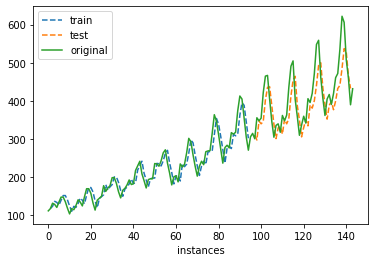

In [25]:
# Ajustando o plot com o sinal original
# - verde   = dataset original
# - azul    = predicoes geradas no conjunto de treinamento
# - laranja = predicoes geradas no conjunto de teste

plt.plot(trainPredictPlot, linestyle="--")
plt.plot(testPredictPlot, linestyle="--")
plt.plot(scaler.inverse_transform(dataset))
plt.xlabel('instances')
plt.legend(['train', 'test', 'original'], loc='upper left')
plt.show()